# 1. Exercise

---
**Ex1**: Given are the following five points $\mathbb{x}_{i}$ with their homogeneous coordinates:

$$\mathbb{x}_{1} = \begin{bmatrix}3\\4\\-5\end{bmatrix}, \mathbb{x}_{2} = \begin{bmatrix}-11\\-60\\-61\end{bmatrix}, \mathbb{x}_{3} = \begin{bmatrix}220\\-21\\-221\end{bmatrix}, \mathbb{x}_{4} = \begin{bmatrix}165\\-52\\173\end{bmatrix}, \mathbb{x}_{5} = \begin{bmatrix}-36\\-77\\-85\end{bmatrix}$$

Give the non-homogeneous coordinates of the five points.

---

**Ex2**: Give the homogeneous matrices for the following transformations of 2D points.


1.   Translation $T_t$ with translation vector $t=[-4,-1]^{T}$.
2.   Rotation $R_\theta$ with $\theta=90^{\circ}$ around the origin.

---

**Ex3**: Given is the point $\mathbb{p}=[2,1]^{T}$. Provide the _non-homogeneous coordinates_ of the transformed points $\mathbb{p}', \mathbb{p}''$ after applying the following transformations using the matrices from **Ex2**.

(a) Translation $\mathbb{p}'=T_{t}(p)$.

(b) Then rotation $\mathbb{p}''=R_\theta(\mathbb{p}')$.

(c) How many different points $\mathbb{p}''$ could you obtain by exchanging the sequence of the two transformations? Give reasons for your answer.

---

**Ex4**: There are two steps in the house transformation shown below to map a point $(x, y)$ to $(x', y')$: translation, and rotation. The transformation between the first and the third 2D coordinates is

$$\begin{bmatrix}x'\\y'\\1\end{bmatrix} = R\cdot\begin{bmatrix}x\\y\\1 \end{bmatrix}$$ where $R=R_{rotation}\cdot R_{translation}$

Suppose $P_{1}=(10,20)$ in the first coordinate and $\theta=30^\circ$, calculate the transformation matrices $R_{translation}, R_{rotation}$, and $R$.

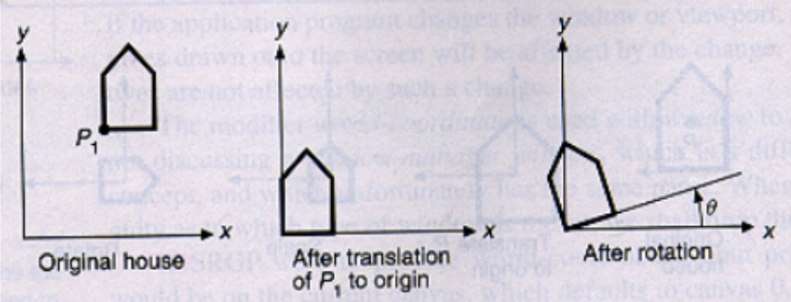

# 2. Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(99)

def draw_poly(points: np.array, label=None):
  if label is None:
    print('The label should be specific and unique for each call')
  poly_closed = np.concatenate([points, points[0].reshape(1, -1)])
  plt.plot(poly_closed[:, 0], poly_closed[:, 1], label=label)


---
**Co1**: Define functions for the transformations of 2D points in _homogeneous coordinates_ and return results in _non-homogeneous coordinates_.

*   **Input**:

      ```points: an array with shape (n, 2) - n points in non-homogeneous coordinates.```
      
      ```t: an array with shape (2, 1) - translation vector.```

      ```theta: float number - rotation in degree.```

      ```s: an array with shape (2, 1) - scaling factors.```
      
*   **Output**:
    ```points_transf: an array with shape (n, 2) - n points in non-homogeneous coordinates after transformation.```

In [ ]:
def translation(points: np.array, t: np.array)-> np.array:
  t = t.ravel()
  points_homo = np.hstack([points, np.ones((points.shape[0], 1))])
  translation_matrix = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]], dtype=float)
  points_transf_homo = (translation_matrix @ points_homo.T).T
  points_transf = points_transf_homo[:, :2] / points_transf_homo[:, 2, np.newaxis]
  return points_transf

def rotate(points: np.array, theta: float)-> np.array:
  theta = np.deg2rad(theta)
  points_homo = np.hstack([points, np.ones((points.shape[0], 1))])
  rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]], dtype=float)
  points_transf_homo = (rotation_matrix @ points_homo.T).T
  points_transf = points_transf_homo[:, :2] / points_transf_homo[:, 2, np.newaxis]
  return points_transf

def scale(points: np.array, s: np.array)-> np.array:
  s = s.ravel()
  points_homo = np.hstack([points, np.ones((points.shape[0], 1))])
  scaling_matrix = np.array([[s[0], 0, 0], [0, s[1], 0], [0, 0, 1]], dtype=float)
  points_transf_homo = (scaling_matrix @ points_homo.T).T
  points_transf = points_transf_homo[:, :2] / points_transf_homo[:, 2, np.newaxis]
  return points_transf


---
**Co2**: Define functions for the rotation of 2D points around a point $\mathbb{p}$ in _homogeneous coordinates_ and return results in _non-homogeneous coordinates_.

*   **Input**:

      ```points: an array with shape (n, 2) - n points in non-homogeneous coordinates.```
      
      ```theta: float number - rotation in degree.```

      ```p: an array with shape (2, 1).```
      
*   **Output**:
    ```points_transf: an array with shape (n, 2) - n points in non-homogeneous coordinates after transformation.```

In [6]:
def rotation_ap(points: np.array, theta: float, p: np.array)-> np.array:

  points_transf = translation(points, -p)
  points_transf = rotate(points_transf, theta)
  points_transf = translation(points_transf, p)
  return points_transf

---
**Co3**: Writing the code for doing transformations using above functions, plotting results as well as showing the legend label for each plot.

*Sample output*

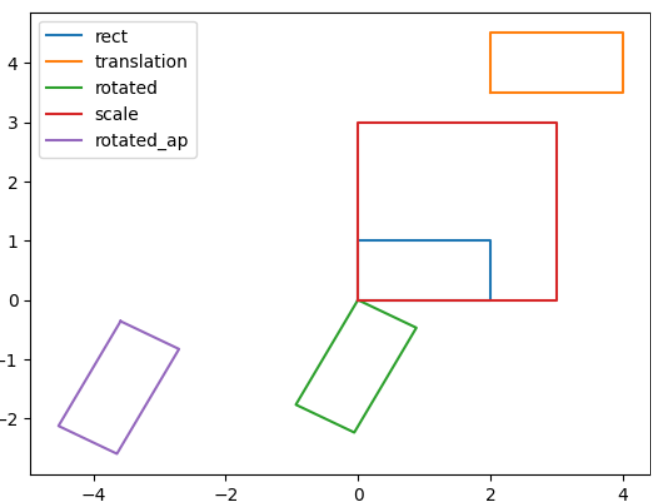

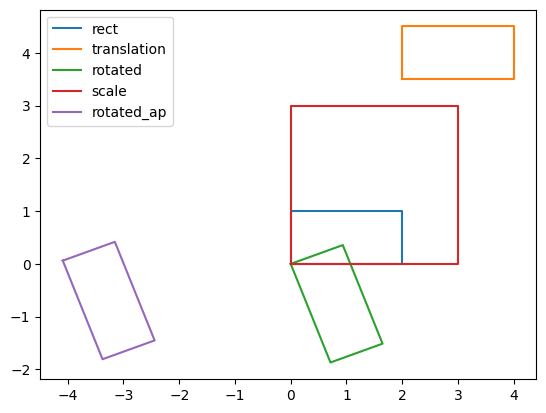

In [10]:
rx, ry = 2, 1
t = np.array([[2], [3.5]])
theta = np.random.rand()*360
s = np.array([[1.5], [3]])

p = np.array([[-2], [3]])

rect_points = np.array([[0, 0], [0, ry], [rx, ry], [rx, 0]])

trans_rec = translation(rect_points, t)
rotated_rec = rotate(rect_points, theta)
scale_rec = scale(rect_points, s)
rotated_ap = rotation_ap(rect_points, theta, p)

draw_poly(rect_points, 'rect')
draw_poly(trans_rec, 'translation')
draw_poly(rotated_rec, 'rotated')
draw_poly(scale_rec, 'scale')
draw_poly(rotated_ap, 'rotated_ap')

plt.legend()